In [42]:
import os
import time
import requests
import csv
from icecream import ic
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [39]:
# ean_numbers = ['541983310278725782', '541792416037150809', '541480930594258894', '541261957970628703', '541560923639711466']

ean_number = '541983310278725782'

start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 1, 31)

all_data = {}

date = start_date
while date <= end_date:

    date_str = date.strftime('%Y-%m-%d')
    # print(date_str)

    with open(f'data_assets/{date_str}.json') as f:
        data = json.load(f)

    data_for_timestamps = data.get("$values")
    for data_for_one_timestamp in data_for_timestamps:

        if data_for_one_timestamp.get('stateTimeQh') in all_data:
            continue
        data_points_for_one_timestamp = data_for_one_timestamp.get('assets')
        # ic(data_points_for_one_timestamp)
        # ic(type(data_points_for_one_timestamp))
        data_point = data_points_for_one_timestamp.get(ean_number)
        # break
        # for data_point in data_points_for_one_timestamp:
        #     # print(data_for_one_timestamp.get('stateTimeQh'))
        #     print("aaa")
        #     ic(data_point)
        #     print("bbb")
        #     # print(data_point.get(ean_number))
        all_data[data_for_one_timestamp.get('stateTimeQh')] = data_points_for_one_timestamp.get(ean_number).get('connected')

    date += timedelta(days=1)

In [40]:
len(all_data)

38012

In [ ]:
for key, value in all_data.items():
    if value:
        print(key, value)

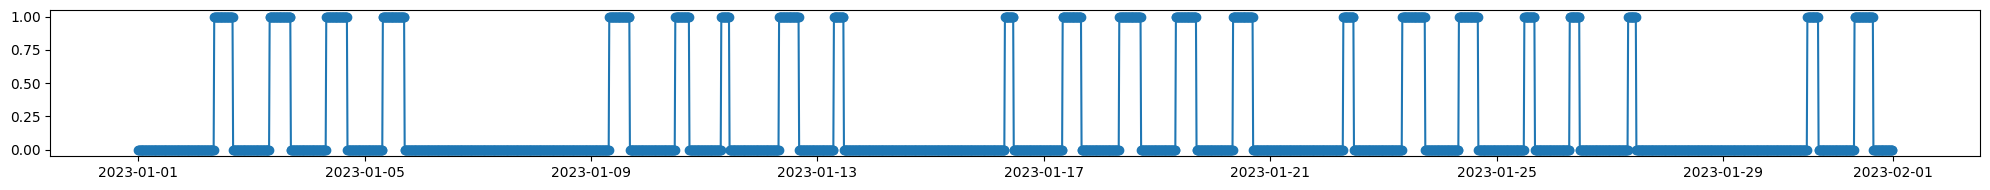

In [36]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from datetime import datetime


# Convert keys to datetime and values to int
x = [datetime.strptime(k, "%Y-%m-%dT%H:%M:%SZ") for k in all_data.keys()]
y = [int(v) for v in all_data.values()]

# Convert datetime objects to Matplotlib date numbers
x = date2num(x)

plt.figure(figsize=(20, 2))

plt.plot_date(x, y, linestyle='solid')
# plt.gcf().autofmt_xdate()  # Beautify the x-labels
plt.tight_layout()

plt.show()

In [41]:
# Save data to csv
with open(f'all_data_{ean_number}.csv', 'w', newline='') as csvfile:
    fieldnames = ['timestamp', 'connected']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for key, value in all_data.items():
        writer.writerow({'timestamp': key, 'connected': value})

In [48]:
ean_numbers = ['541983310278725782', '541792416037150809', '541480930594258894', '541261957970628703', '541560923639711466']

for ean_number in ean_numbers:
    print("---------------------------------------------------------------------------")
    print(ean_number)

    start_date = datetime(2023, 1, 1)
    end_date = datetime(2024, 1, 31)

    all_data = {}

    date = start_date
    while date <= end_date:

        date_str = date.strftime('%Y-%m-%d')
        # print(date_str)

        with open(f'data_assets/{date_str}.json') as f:
            data = json.load(f)

        data_for_timestamps = data.get("$values")
        for data_for_one_timestamp in data_for_timestamps:

            if data_for_one_timestamp.get('stateTimeQh') in all_data:
                continue
            data_points_for_one_timestamp = data_for_one_timestamp.get('assets')
            # ic(data_points_for_one_timestamp)
            # ic(type(data_points_for_one_timestamp))
            data_point = data_points_for_one_timestamp.get(ean_number)
            # break
            # for data_point in data_points_for_one_timestamp:
            #     # print(data_for_one_timestamp.get('stateTimeQh'))
            #     print("aaa")
            #     ic(data_point)
            #     print("bbb")
            #     # print(data_point.get(ean_number))
            all_data[data_for_one_timestamp.get('stateTimeQh')] = data_points_for_one_timestamp.get(ean_number).get('connected')

        date += timedelta(days=1)
    
    with open(f'data_assets_reformatted/all_data_{ean_number}.csv', 'w', newline='') as csvfile:
        fieldnames = ['timestamp', 'connected']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for key, value in all_data.items():
            writer.writerow({'timestamp': key, 'connected': value})

---------------------------------------------------------------------------
541983310278725782
---------------------------------------------------------------------------
541792416037150809
---------------------------------------------------------------------------
541480930594258894
---------------------------------------------------------------------------
541261957970628703
---------------------------------------------------------------------------
541560923639711466
